In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from random import random

from society.agent import Agent, TrainableAgent
from society.simulations.weighted import WeightedNetworkSimulation
from society.strategies.gameplay.constant import AllC, AllD
from society.strategies.gameplay.random import RandomGameplayStrategy
from society.strategies.gameplay.tft import TitForTat
from society.strategies.gameplay.qlearning import TabularQLearningGameplayStrategy
from society.visualisation.network import *
from society.action import Action

plt.rcParams["figure.figsize"] = (10, 6)

In [ ]:
POPULATION = 30
agents = [
    Agent(None, TabularQLearningGameplayStrategy(lookback=3), i, POPULATION)
    for i in range(POPULATION)
]

# for i in range(1, 9):
#     agents[i] = Agent(None, TitForTat(), i, POPULATION)

G = nx.connected_caveman_graph(3, 10)

weights_matrix = np.zeros((POPULATION, POPULATION))
for u, v, d in G.edges(data=True):
    weights_matrix[u, v] = weights_matrix[v, u] = 1.0
    try:
        d["weight"] = weights_matrix[u, v]
    except:
        d["weight"] = 0

plot_matrix(weights_matrix, digits=2, figsize=(20, 12))

In [ ]:
nx.draw(G, pos=nx.spring_layout(G), font_color="white", with_labels=True)

In [ ]:
sim = WeightedNetworkSimulation(agents, weights_matrix)
sim.reset()

for i in range(100000):
    sim.play_round()


[(7, 377119), (19, 374180), (5, 366838), (22, 361173), (8, 359382), (29, 357436), (16, 355641), (23, 352375), (18, 345786), (15, 342952), (12, 342625), (10, 342020), (14, 341727), (13, 341045), (17, 339225), (4, 338913), (9, 338006), (25, 329482), (24, 328019), (11, 319252), (27, 317920), (28, 314742), (26, 307231), (21, 303744), (20, 303369), (2, 301639), (6, 295320), (3, 294881), (1, 291127), (0, 289041)]


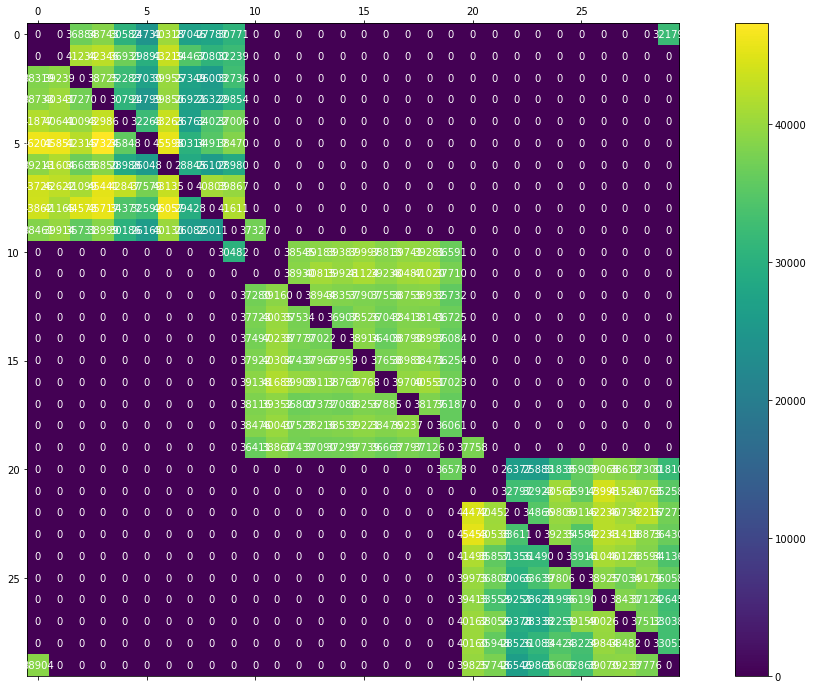

In [6]:
returns_matrix = [[sum(r) if len(r) > 0 else 0 for r in agent] for agent in sim.rewards]
ranked_partners = sorted([(i, sum(returns_matrix[i])) for i in range(POPULATION)], key=lambda x: x[1], reverse=True)
print(ranked_partners)

plot_matrix(returns_matrix, figsize=(20, 12))

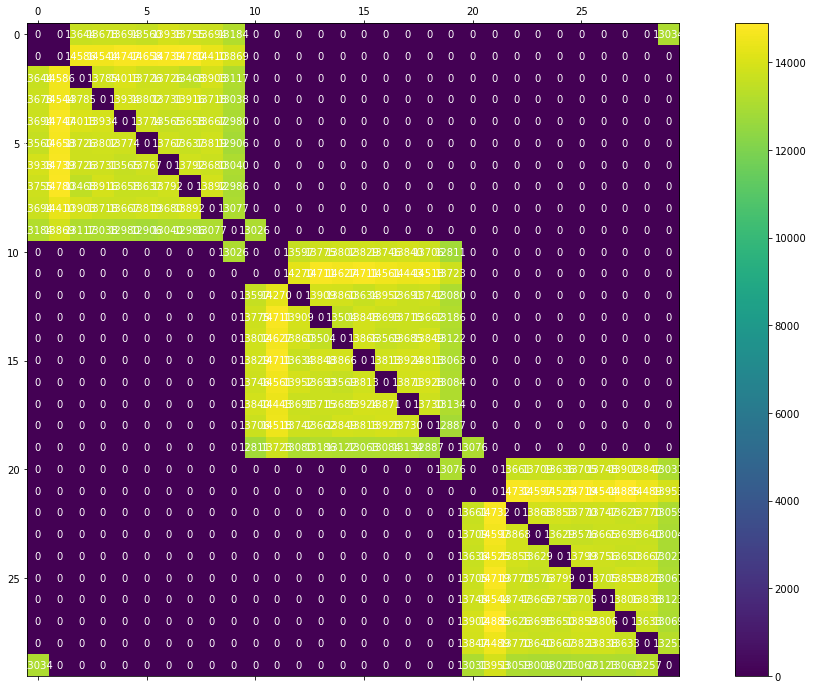

In [7]:
frequency_matrix = [[len(r) for r in agent] for agent in sim.rewards]

plot_matrix(frequency_matrix, figsize=(20, 12))

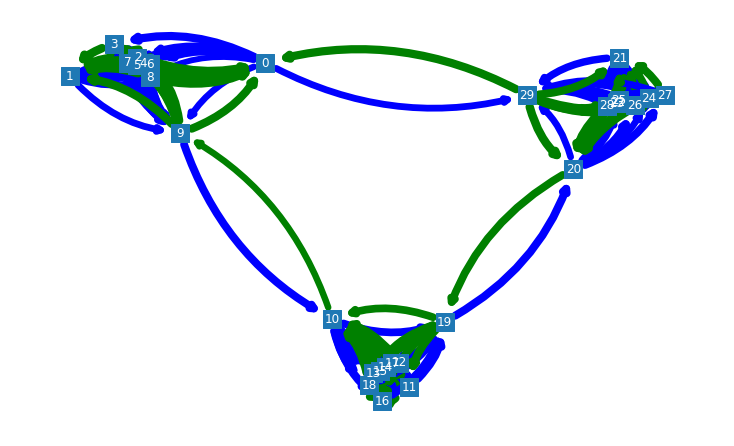

In [8]:
dg = nx.MultiDiGraph(G)

for u, v, d in dg.edges(data=True):
    try:
        d["weight"] = returns_matrix[u][v]
    except:
        d["weight"] = 0

plot_graph_spring(dg)

In [9]:
nx.drawing.nx_pydot.write_dot(dg, "test8.dot")

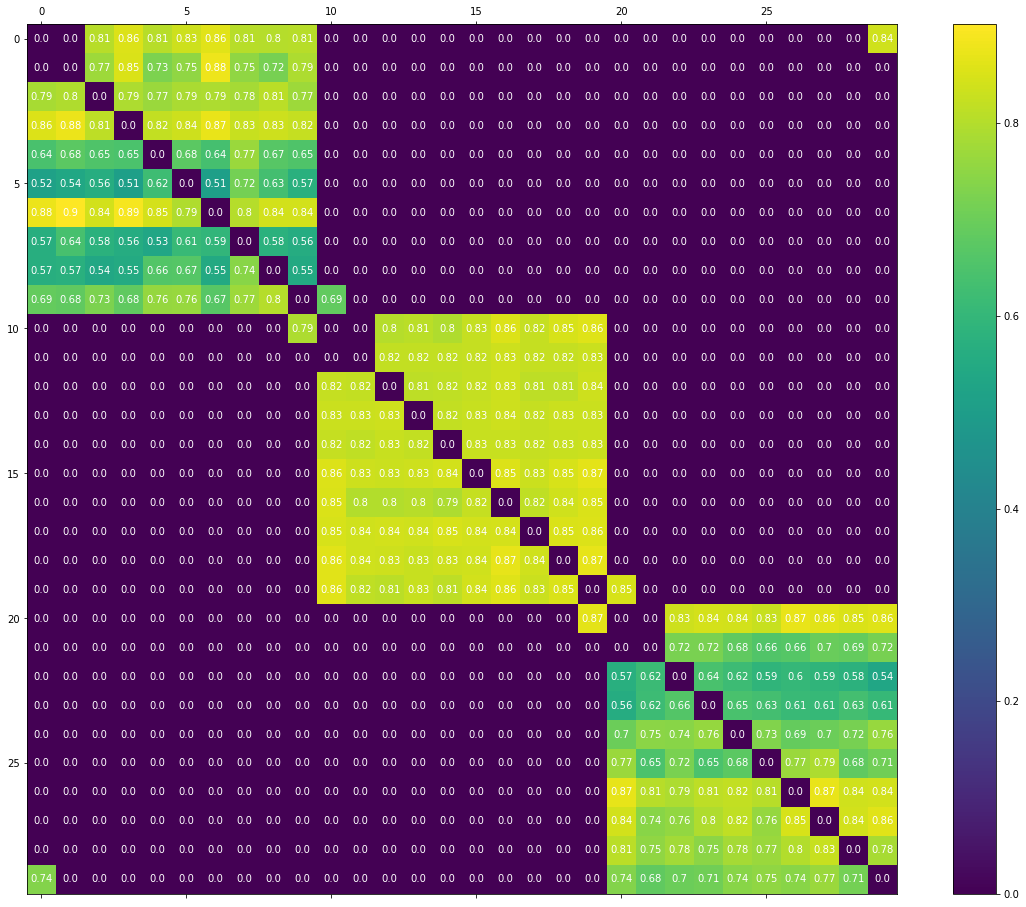

In [10]:
cooperativeness_matrix = [[r.count(Action.COOPERATE) / len(r) if r else 0 for r in agent] for agent in sim.histories]

plot_matrix(cooperativeness_matrix, figsize=(20, 16), digits=2)

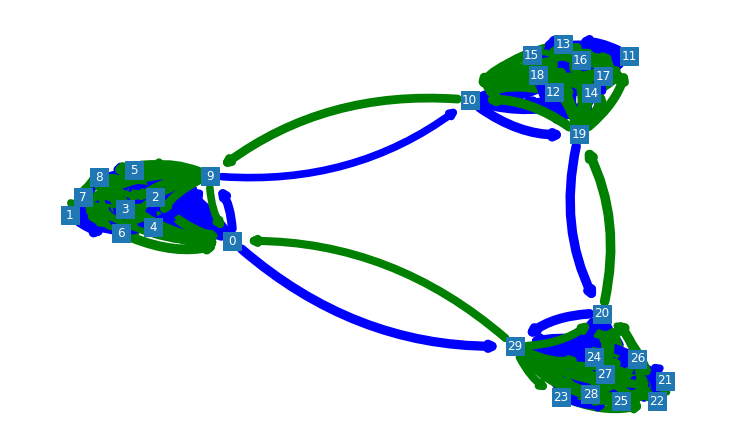

In [11]:
cooperativeness_graph = nx.MultiDiGraph(G)

for u, v, d in cooperativeness_graph.edges(data=True):
    try:
        d["weight"] = sim.histories[u][v].count(Action.COOPERATE) / len(sim.histories[u][v])
    except:
        d["weight"] = 0

plot_graph_spring(cooperativeness_graph)

nx.drawing.nx_pydot.write_dot(dg, "test8-coop.dot")

In [12]:
policy = np.zeros((4, 4, 4))

for agent in agents:
    policy += agent.gameplay_strategy._q_table.argmax(axis=-1)

policy /= len(agents)

policy

array([[[0.6       , 0.4       , 0.3       , 0.33333333],
        [0.43333333, 0.36666667, 0.2       , 0.13333333],
        [0.53333333, 0.16666667, 0.16666667, 0.1       ],
        [0.56666667, 0.16666667, 0.13333333, 0.1       ]],

       [[0.6       , 0.6       , 0.3       , 0.2       ],
        [0.5       , 0.53333333, 0.1       , 0.03333333],
        [0.33333333, 0.1       , 0.1       , 0.1       ],
        [0.23333333, 0.1       , 0.03333333, 0.06666667]],

       [[0.7       , 0.5       , 0.2       , 0.26666667],
        [0.46666667, 0.13333333, 0.1       , 0.03333333],
        [0.33333333, 0.1       , 0.13333333, 0.13333333],
        [0.23333333, 0.13333333, 0.03333333, 0.06666667]],

       [[0.63333333, 0.46666667, 0.23333333, 0.33333333],
        [0.26666667, 0.03333333, 0.13333333, 0.03333333],
        [0.26666667, 0.06666667, 0.16666667, 0.06666667],
        [0.03333333, 0.        , 0.1       , 0.03333333]]])

In [13]:
actions = ["(C, C)", "(C, D)", "(D, C)", "(D, D)"]

for i, a in enumerate(actions):
    for j, b in enumerate(actions):
        for k, c in enumerate(actions):
            print(f"{a:<8} {b:<8} {c:<8} => {('C', 'D')[round(policy[i, j, k])]:<4} [{round(policy[i, j, k], 5):05f}]")

(C, C)   (C, C)   (C, C)   => D    [0.600000]
(C, C)   (C, C)   (C, D)   => C    [0.400000]
(C, C)   (C, C)   (D, C)   => C    [0.300000]
(C, C)   (C, C)   (D, D)   => C    [0.333330]
(C, C)   (C, D)   (C, C)   => C    [0.433330]
(C, C)   (C, D)   (C, D)   => C    [0.366670]
(C, C)   (C, D)   (D, C)   => C    [0.200000]
(C, C)   (C, D)   (D, D)   => C    [0.133330]
(C, C)   (D, C)   (C, C)   => D    [0.533330]
(C, C)   (D, C)   (C, D)   => C    [0.166670]
(C, C)   (D, C)   (D, C)   => C    [0.166670]
(C, C)   (D, C)   (D, D)   => C    [0.100000]
(C, C)   (D, D)   (C, C)   => D    [0.566670]
(C, C)   (D, D)   (C, D)   => C    [0.166670]
(C, C)   (D, D)   (D, C)   => C    [0.133330]
(C, C)   (D, D)   (D, D)   => C    [0.100000]
(C, D)   (C, C)   (C, C)   => D    [0.600000]
(C, D)   (C, C)   (C, D)   => D    [0.600000]
(C, D)   (C, C)   (D, C)   => C    [0.300000]
(C, D)   (C, C)   (D, D)   => C    [0.200000]
(C, D)   (C, D)   (C, C)   => C    [0.500000]
(C, D)   (C, D)   (C, D)   => D   

In [21]:
best_agent = agents[ranked_partners[0][0]]

best_policy = best_agent.gameplay_strategy._q_table.argmax(axis=-1)

for i, a in enumerate(actions):
    for j, b in enumerate(actions):
        for k, c in enumerate(actions):
            print(f"{a:<8} {b:<8} {c:<8} => {('C', 'D')[round(best_policy[i, j, k])]:<4} {best_agent.gameplay_strategy._q_table[i, j, k]}")


(C, C)   (C, C)   (C, C)   => D    [264.98791877 290.87035217]
(C, C)   (C, C)   (C, D)   => C    [276.60946829 262.11881326]
(C, C)   (C, C)   (D, C)   => D    [267.87904533 294.08306347]
(C, C)   (C, C)   (D, D)   => C    [283.70271314 263.56864717]
(C, C)   (C, D)   (C, C)   => D    [266.00510832 283.28661495]
(C, C)   (C, D)   (C, D)   => D    [259.92932403 281.04911667]
(C, C)   (C, D)   (D, C)   => D    [163.19027503 282.71655953]
(C, C)   (C, D)   (D, D)   => C    [251.1555835   59.15699645]
(C, C)   (D, C)   (C, C)   => D    [263.91829465 281.8394363 ]
(C, C)   (D, C)   (C, D)   => C    [285.82147915 238.41785323]
(C, C)   (D, C)   (D, C)   => D    [279.18113915 296.55598211]
(C, C)   (D, C)   (D, D)   => C    [295.28382165 263.54726645]
(C, C)   (D, D)   (C, C)   => D    [272.88434103 293.8002366 ]
(C, C)   (D, D)   (C, D)   => C    [282.77755784 226.75598453]
(C, C)   (D, D)   (D, C)   => D    [265.20433751 297.45643984]
(C, C)   (D, D)   (D, D)   => C    [284.7082187   31.61

In [15]:
best_agent.gameplay_strategy._q_table

array([[[[264.98791877, 290.87035217],
         [276.60946829, 262.11881326],
         [267.87904533, 294.08306347],
         [283.70271314, 263.56864717]],

        [[266.00510832, 283.28661495],
         [259.92932403, 281.04911667],
         [163.19027503, 282.71655953],
         [251.1555835 ,  59.15699645]],

        [[263.91829465, 281.8394363 ],
         [285.82147915, 238.41785323],
         [279.18113915, 296.55598211],
         [295.28382165, 263.54726645]],

        [[272.88434103, 293.8002366 ],
         [282.77755784, 226.75598453],
         [265.20433751, 297.45643984],
         [284.7082187 ,  31.61645651]]],


       [[[270.10523763, 287.83069042],
         [280.33019634, 266.91354562],
         [268.85192539, 293.07166238],
         [285.58458438, 261.83287776]],

        [[278.98190776, 240.7978416 ],
         [266.93800812,  27.23305416],
         [259.28498478, 301.75473302],
         [271.60315561,  85.25693353]],

        [[269.31469812, 213.80523995],
         [2

In [16]:
worst_agent = agents[ranked_partners[-1][0]]

worst_policy = worst_agent.gameplay_strategy._q_table.argmax(axis=-1)

for i, a in enumerate(actions):
    for j, b in enumerate(actions):
        for k, c in enumerate(actions):
            print(f"{a:<8} {b:<8} {c:<8} => {('C', 'D')[round(worst_policy[i, j, k])]:<4}")


(C, C)   (C, C)   (C, C)   => C   
(C, C)   (C, C)   (C, D)   => D   
(C, C)   (C, C)   (D, C)   => C   
(C, C)   (C, C)   (D, D)   => C   
(C, C)   (C, D)   (C, C)   => C   
(C, C)   (C, D)   (C, D)   => D   
(C, C)   (C, D)   (D, C)   => C   
(C, C)   (C, D)   (D, D)   => C   
(C, C)   (D, C)   (C, C)   => C   
(C, C)   (D, C)   (C, D)   => C   
(C, C)   (D, C)   (D, C)   => C   
(C, C)   (D, C)   (D, D)   => C   
(C, C)   (D, D)   (C, C)   => D   
(C, C)   (D, D)   (C, D)   => D   
(C, C)   (D, D)   (D, C)   => C   
(C, C)   (D, D)   (D, D)   => C   
(C, D)   (C, C)   (C, C)   => D   
(C, D)   (C, C)   (C, D)   => D   
(C, D)   (C, C)   (D, C)   => C   
(C, D)   (C, C)   (D, D)   => C   
(C, D)   (C, D)   (C, C)   => D   
(C, D)   (C, D)   (C, D)   => D   
(C, D)   (C, D)   (D, C)   => C   
(C, D)   (C, D)   (D, D)   => C   
(C, D)   (D, C)   (C, C)   => D   
(C, D)   (D, C)   (C, D)   => C   
(C, D)   (D, C)   (D, C)   => C   
(C, D)   (D, C)   (D, D)   => C   
(C, D)   (D, D)   (C